In [1]:
import pandas as pd
import sys

### Load Dataset

In [106]:
### Place the downloaded data file under dataset/ folder

news = pd.read_csv('dataset/news.csv')
news_tweets = pd.read_csv('dataset/news_tweets.csv')
user_resp = pd.read_csv('dataset/user_resp.csv')

In [4]:
user_resp_ = user_resp.drop_duplicates(subset = ['tweet_id', 'conversation_id'])

In [ ]:
news.shape, news_tweets.shape, user_resp.shape

In [4]:
# user_resp_.joy.mean()

In [ ]:
# news[news.topics == 'proud boys'].publication.value_counts()

### Group news publishers based on political leaning

In [5]:
R_news = news[((news['publication'] == 'Breitbart News') | (news['publication'] == 'Fox News'))]
L_news = news[((news['publication'] == 'CNN') | (news['publication'] == 'The Washington Post'))]
C_news = news[((news['publication'] == 'Business Insider') | (news['publication'] ==  'USA Today'))]

R_news_tweets = news_tweets[((news_tweets['publication'] == 'Breitbart News') | (news_tweets['publication'] == 'Fox News'))]
L_news_tweets = news_tweets[((news_tweets['publication'] == 'CNN') | (news_tweets['publication'] == 'The Washington Post'))]
C_news_tweets = news_tweets[((news_tweets['publication'] == 'Business Insider') | (news_tweets['publication'] ==  'USA Today'))]

In [8]:
R_news.shape, L_news.shape, C_news.shape

((15704, 32), (11163, 32), (9019, 32))

In [232]:
import seaborn as sns
import matplotlib.pyplot as plt

def get_entity_senti(df, ent, leaning):

    temp_df = df[df[ent + '_flag'] == True][[ent + '_neg_new', ent + '_pos_new', ent + '_neu_new']]
    temp_df = temp_df.rename(columns = {ent + '_neg_new': 'neg', ent + '_neu_new': 'neu', ent + '_pos_new': 'pos'})
    temp_df['leaning'] = [leaning] * df.shape[0]
    
    return temp_df

def compare_dist(ent, senti):

    temp_df_R = get_entity_senti(R_news[R_news[ent + '_flag'] == True], ent, 'RIGHT')
    temp_df_L = get_entity_senti(L_news[L_news[ent + '_flag'] == True], ent, 'LEFT')
    
    m = min(temp_df_R.shape[0], temp_df_L.shape[0])
    temp_df_R = temp_df_R.sample(m, random_state = 42)
    temp_df_L = temp_df_L.sample(m, random_state = 42)
    
    temp_df = pd.concat((temp_df_L, temp_df_R), axis = 0)
    
    ax = plt.figure(figsize=(5,2))
    
    sns.displot(temp_df, ax = ax, x=senti, hue="leaning", kind = 'kde', fill = False, legend = False)
    plt.legend(title= 'News Source', fontsize = 13, labels=['Right', 'Left'], title_fontsize=15, bbox_to_anchor=(0.70, 0.30))
    plt.ylabel('Density', fontsize = 20)
    
    if(senti == 'pos'):
        senti = 'Positive'
    elif(senti == 'neg'):
        senti = 'Negative'
    elif(senti == 'neu'):
        senti = 'Neutral'    
    
    plt.xlabel(senti, fontsize = 20)
    
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    
    plt.title(ent.title(), fontsize = 25, y = 0.80, x = 0.50)
    # plt.setp(ax.get_legend().get_title(), fontsize='15')
    # plt.legend(bbox_to_anchor=(0.80, 0.80))
    # plt.legend(loc='upper left')
    
    # plt.savefig('figures/dist_comparison/' + ent + "_" + senti + '.png')
    plt.show()

### Compare sentiment distribution via distribution plot

/home/ahaque2/venv/py3_10/lib/python3.10/site-packages/seaborn/distributions.py:2142: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try kdeplot.
  warnings.warn(msg, UserWarning)


<Figure size 500x200 with 0 Axes>

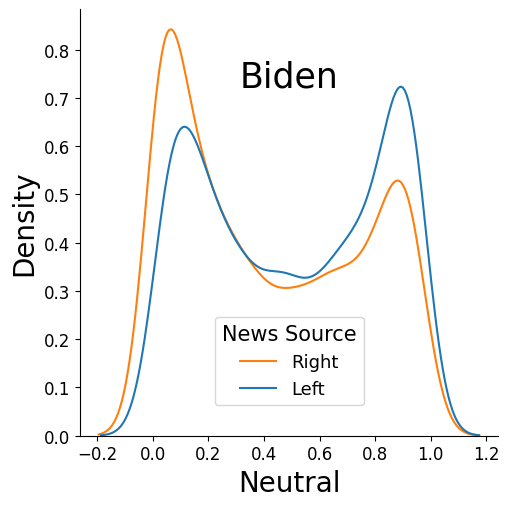

/home/ahaque2/venv/py3_10/lib/python3.10/site-packages/seaborn/distributions.py:2142: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try kdeplot.
  warnings.warn(msg, UserWarning)


<Figure size 500x200 with 0 Axes>

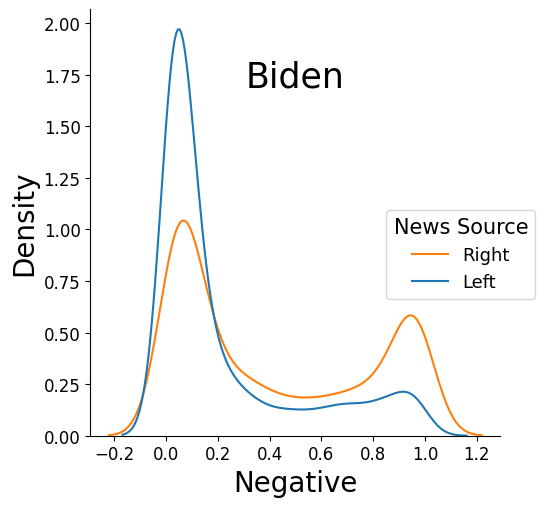

/home/ahaque2/venv/py3_10/lib/python3.10/site-packages/seaborn/distributions.py:2142: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try kdeplot.
  warnings.warn(msg, UserWarning)


<Figure size 500x200 with 0 Axes>

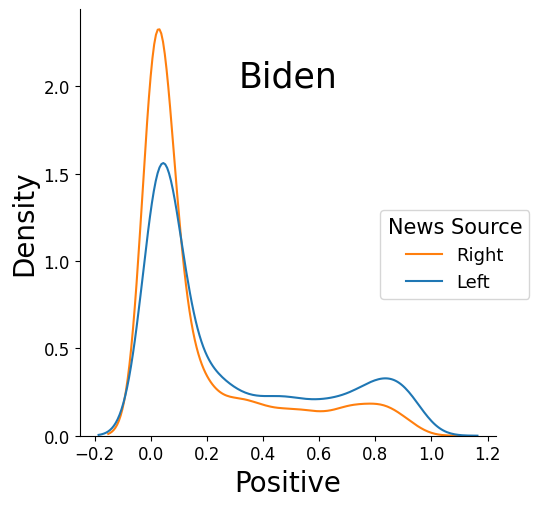

In [233]:
compare_dist('biden', 'neu')
compare_dist('biden', 'neg')
compare_dist('biden', 'pos')

/home/ahaque2/venv/py3_10/lib/python3.10/site-packages/seaborn/distributions.py:2142: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try kdeplot.
  warnings.warn(msg, UserWarning)


<Figure size 500x200 with 0 Axes>

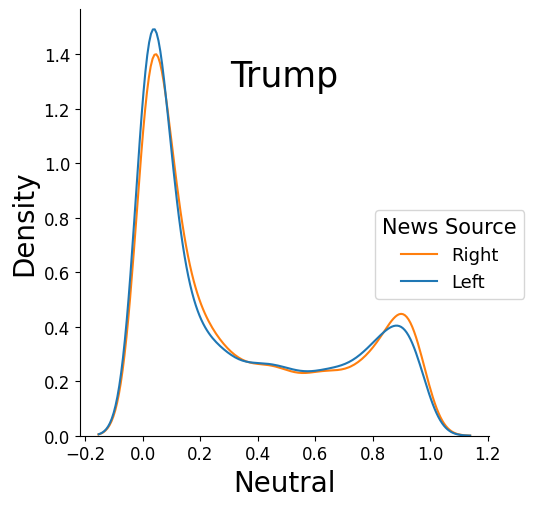

/home/ahaque2/venv/py3_10/lib/python3.10/site-packages/seaborn/distributions.py:2142: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try kdeplot.
  warnings.warn(msg, UserWarning)


<Figure size 500x200 with 0 Axes>

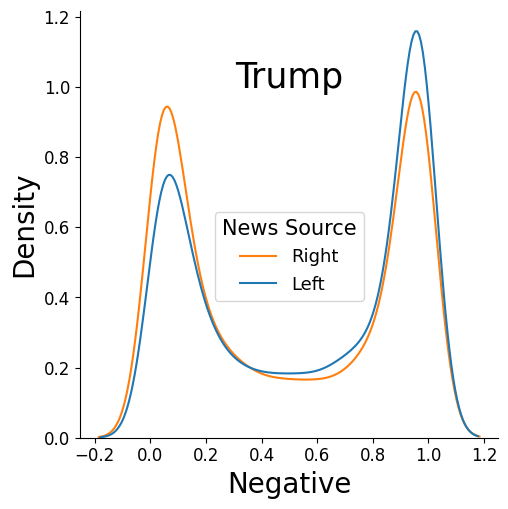

/home/ahaque2/venv/py3_10/lib/python3.10/site-packages/seaborn/distributions.py:2142: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try kdeplot.
  warnings.warn(msg, UserWarning)


<Figure size 500x200 with 0 Axes>

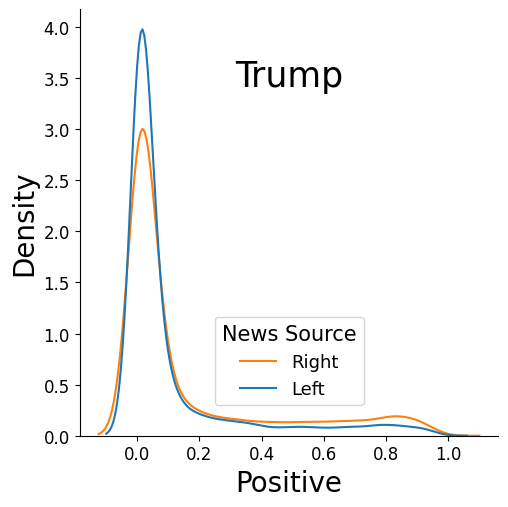

In [234]:
compare_dist('trump', 'neu')
compare_dist('trump', 'neg')
compare_dist('trump', 'pos')

## Mean sentiments 

In [228]:
cols = ['publication', 'trump_pos_new', 'trump_neg_new', 'trump_neu_new', 'biden_pos_new', 'biden_neg_new', 'biden_neu_new']

In [ ]:
R_news = news[((news['publication'] == 'Breitbart News') | (news['publication'] == 'Fox News'))]
L_news = news[((news['publication'] == 'CNN') | (news['publication'] == 'The Washington Post'))]
C_news = news[((news['publication'] == 'Business Insider') | (news['publication'] ==  'USA Today'))]

In [229]:
df1 = pd.DataFrame(R_news[cols].mean(), columns = ['Right'])
df2 = pd.DataFrame(L_news[cols].mean(), columns = ['Left'])
df3 = pd.DataFrame(C_news[cols].mean(), columns = ['Center'])

pd.concat((df1, df2, df3), axis = 1).T

/tmp/ipykernel_874630/1640553907.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1 = pd.DataFrame(R_news[cols].mean(), columns = ['Right'])
/tmp/ipykernel_874630/1640553907.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df2 = pd.DataFrame(L_news[cols].mean(), columns = ['Left'])
/tmp/ipykernel_874630/1640553907.py:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid 

,trump_pos_new,trump_neg_new,trump_neu_new,biden_pos_new,biden_neg_new,biden_neu_new
Right,0.161783,0.503286,0.334931,0.177913,0.409237,0.412850
Left,0.110019,0.567835,0.322146,0.274957,0.217636,0.507407
Center,0.128275,0.550279,0.321447,0.294181,0.243145,0.462674


In [231]:
R_news_tweets = news_tweets[((news_tweets['publication'] == 'Breitbart News') | (news_tweets['publication'] == 'Fox News'))]
L_news_tweets = news_tweets[((news_tweets['publication'] == 'CNN') | (news_tweets['publication'] == 'The Washington Post'))]
C_news_tweets = news_tweets[((news_tweets['publication'] == 'Business Insider') | (news_tweets['publication'] ==  'USA Today'))]

df1 = pd.DataFrame(R_news_tweets[cols].mean(), columns = ['Right'])
df2 = pd.DataFrame(L_news_tweets[cols].mean(), columns = ['Left'])
df3 = pd.DataFrame(C_news_tweets[cols].mean(), columns = ['Center'])

pd.concat((df2, df3, df1), axis = 1).T
# to_csv('results/sentiment_analysis/mean_tweet_sentiments.csv')

/tmp/ipykernel_874630/1878266220.py:5: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1 = pd.DataFrame(R_news_tweets[cols].mean(), columns = ['Right'])
/tmp/ipykernel_874630/1878266220.py:6: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df2 = pd.DataFrame(L_news_tweets[cols].mean(), columns = ['Left'])
/tmp/ipykernel_874630/1878266220.py:7: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Sele

,trump_pos_new,trump_neg_new,trump_neu_new,biden_pos_new,biden_neg_new,biden_neu_new
Left,0.128716,0.597733,0.273551,0.328512,0.230037,0.441451
Center,0.133506,0.550741,0.315754,0.313517,0.239153,0.447329
Right,0.207249,0.419372,0.373380,0.175430,0.446622,0.377948
